# *Clustering Model to Group Days Based on Activity and Sleep Data*

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Load and Explore the Data

In [3]:
df = pd.read_csv("MySteps.csv" )
df.head()

,Full_date,Day_Name,steps,Activity,distance,runDistance,calories,Year,Month Name,DayType,Full_date (Quarter),Full_date (Month Index),Full_date (Month),deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,01-May-16,Sunday,3869,Low,2651,0,244,2016,May,Weekend,Qtr2,5,May,0,0,0,1461708000,1461708000
1,08-May-16,Sunday,4088,Low,3119,0,197,2016,May,Weekend,Qtr2,5,May,158,262,2,1461801240,1461826560
2,09-May-16,Monday,1958,Low,1266,0,134,2016,May,Weekday,Qtr2,5,May,234,241,0,1461883500,1461912000
3,11-May-16,Wednesday,2569,Low,1661,0,198,2016,May,Weekday,Qtr2,5,May,239,318,0,1461979500,1462012920
4,13-May-16,Friday,4276,Low,2809,0,251,2016,May,Weekday,Qtr2,5,May,180,333,3,1462065840,1462096800


### EDA

In [6]:
print(df.isnull().sum())

Full_date                  0
Day_Name                   0
steps                      0
Activity                   0
distance                   0
runDistance                0
calories                   0
Year                       0
Month Name                 0
DayType                    0
Full_date (Quarter)        0
Full_date (Month Index)    0
Full_date (Month)          0
deepSleepTime              0
shallowSleepTime           0
wakeTime                   0
start                      0
stop                       0
dtype: int64


In [8]:
df.info

<bound method DataFrame.info of       Full_date   Day_Name  steps  Activity  distance  runDistance  calories  \
0     01-May-16     Sunday   3869       Low      2651            0       244   
1     08-May-16     Sunday   4088       Low      3119            0       197   
2     09-May-16     Monday   1958       Low      1266            0       134   
3     11-May-16  Wednesday   2569       Low      1661            0       198   
4     13-May-16     Friday   4276       Low      2809            0       251   
...         ...        ...    ...       ...       ...          ...       ...   
2449  10-Oct-22     Monday   6497  Moderate      4735         3727       228   
2450  17-Oct-22     Monday   8660  Moderate      6181         4954       285   
2451  24-Oct-22     Monday   8192  Moderate      5900         4632       547   
2452  21-Nov-22     Monday   6923  Moderate      4708         3735       246   
2453  02-Jan-23     Monday   8093  Moderate      5795         4504       284   

      Y

###  Data Preprocessing

In [10]:
features = ['steps', 'distance', 'runDistance', 'deepSleepTime', 'shallowSleepTime', 'wakeTime']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)
df_scaled.head()

,steps,distance,runDistance,deepSleepTime,shallowSleepTime,wakeTime
0,-0.659195,-0.678407,-0.452894,-1.469155,-1.777284,-0.175450
1,-0.626340,-0.582331,-0.452894,0.709661,0.205467,-0.093990
2,-0.945893,-0.962736,-0.452894,1.757699,0.046544,-0.175450
3,-0.854227,-0.881646,-0.452894,1.826649,0.629261,-0.175450
4,-0.598135,-0.645971,-0.452894,1.013040,0.742778,-0.053261


### Find the Optimal Number of Clusters (K)

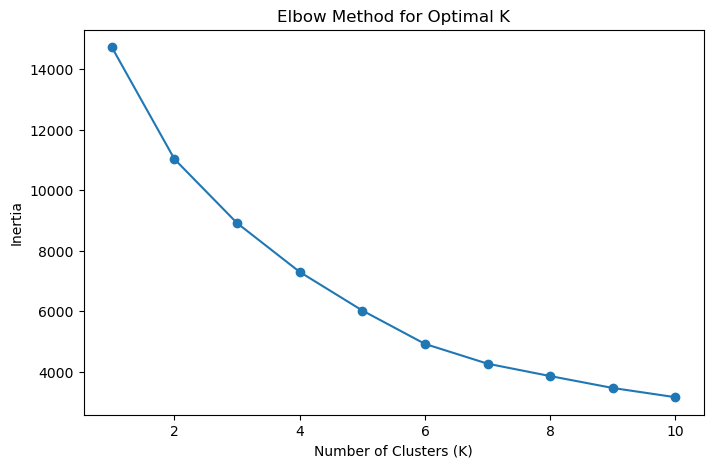

In [14]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

### Train K-Means Model

In [16]:
optimal_k = 3  
# Train K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

df[['steps', 'distance', 'runDistance', 'deepSleepTime', 'shallowSleepTime', 'wakeTime', 'Cluster']].head()

,steps,distance,runDistance,deepSleepTime,shallowSleepTime,wakeTime,Cluster
0,3869,2651,0,0,0,0,2
1,4088,3119,0,158,262,2,0
2,1958,1266,0,234,241,0,0
3,2569,1661,0,239,318,0,0
4,4276,2809,0,180,333,3,0


###  Visualization

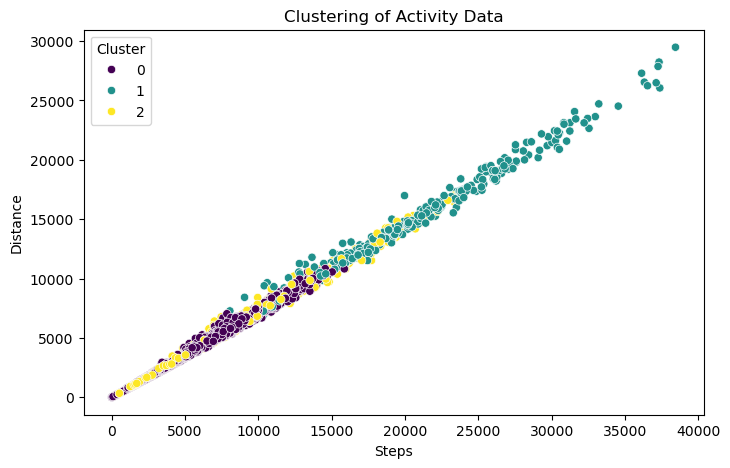

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['steps'], y=df['distance'], hue=df['Cluster'], palette="viridis")
plt.xlabel("Steps")
plt.ylabel("Distance")
plt.title("Clustering of Activity Data")
plt.show()

### Summary

- This notebook focuses on grouping days based on activity and sleep patterns using **K-Means** Clustering. The goal is to identify patterns in daily behavior based on movement and rest.

- The dataset is preprocessed by handling missing values, selecting relevant features, and scaling the data for better clustering results.

- The **Elbow Method** is used to determine the optimal number of clusters, which was found to be X. Based on clustering results, the days are grouped as follows:

- **Cluster 0**: Days with low activity and less sleep
- **Cluster 1**: Days with moderate activity and balanced sleep
- **Cluster 2**: Days with high activity and longer sleep
- A scatter plot is used to visualize the clusters, with different colors representing each group. This helps in understanding how different days vary in terms of activity and sleep.

- By identifying these patterns, this analysis can be useful for tracking fitness trends and optimizing sleep habits.